## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/Capstone Project/Agriculture/Implementation/corn_dataset/train'
valid_path = 'D:/Capstone Project/Agriculture/Implementation/corn_dataset/valid'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('D:/Capstone Project/Agriculture/Implementation/corn_dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/Capstone Project/Agriculture/Implementation/corn_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7316 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('D:/Capstone Project/Agriculture/Implementation/corn_dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1829 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\dubey\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
229/229 [==============================] - 88s 332ms/step - loss: 1.1809 - accuracy: 0.8783 - val_loss: 0.8067 - val_accuracy: 0.9311
Epoch 2/20
229/229 [==============================] - 66s 289ms/step - loss: 0.6383 - accuracy: 0.9359 - val_loss: 0.9392 - val_accuracy: 0.9191
Epoch 3/20
229/229 [==============================] - 68s 299ms/step - loss: 0.5454 - accuracy: 0.9475 - val_loss: 0.7531 - val_accuracy: 0.9295
Epoch 4/20
229/229 [==============================] - 72s 315ms/step - loss: 0.4524 - accuracy: 0.9541 - val_loss: 0.6176 - val_accuracy: 0.9524
Epoch 5/20
229/229 [==============================] - 81s 356ms/step - loss: 0.4639 - accuracy: 0.9571 - val_loss: 0.7886 - val_accuracy: 0.9497
Epoch 6/20
229/229 [==============================] - 73s 319ms/step - loss: 0.5960 - accuracy: 0.9534 - val_loss: 0.5843 - val_accuracy: 0.9595
Epoch 7/20
229/229 [==============================] - 73s 320ms/step - loss: 0.3836 - accuracy: 0.9645 - val_loss: 0.7497 - val_ac

In [15]:
import matplotlib.pyplot as plt

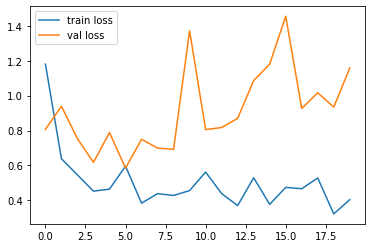

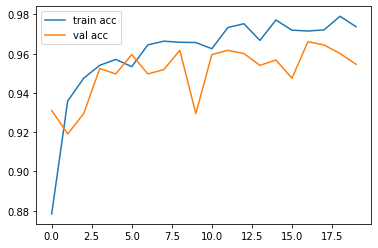

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.2278294e-08, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 4.3494682e-17, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 2, 3, ..., 0, 0, 3], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_inception.h5')

In [25]:
img_data

NameError: name 'img_data' is not defined

In [28]:
img=image.load_img('D:/Capstone Project/Agriculture/Implementation/corn_dataset/test/CornCommonRust1.jpg',target_size=(224,224))

In [29]:
x=image.img_to_array(img)
x

array([[[  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  3.,   3.,   3.],
        ...,
        [  4.,   3.,   1.],
        [  6.,   2.,   1.],
        [  6.,   2.,   0.]],

       [[  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  3.,   3.,   3.],
        ...,
        [  4.,   3.,   1.],
        [  6.,   2.,   1.],
        [  6.,   2.,   0.]],

       [[  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  3.,   3.,   3.],
        ...,
        [  4.,   3.,   1.],
        [  4.,   3.,   1.],
        [  4.,   3.,   0.]],

       ...,

       [[ 72.,  67.,  27.],
        [ 80.,  77.,  36.],
        [ 83.,  81.,  40.],
        ...,
        [  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  3.,   3.,   3.]],

       [[ 91.,  83.,  46.],
        [ 93.,  88.,  48.],
        [ 89.,  86.,  45.],
        ...,
        [  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  3.,   3.,   3.]],

       [[ 86.,  78.,  41.],
        [ 95.,  90.,  52.],
        [101.,  

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[4.1185193e-21, 1.0000000e+00, 1.4223313e-33, 3.7943586e-22]],
      dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__